#Supply Chain - Customer Satisfaction: Data Visualization

##Introduction

The goal of this notebook is to satisfy Step 1 detailed below of our Data Science project "Supply Chain - Customer Satisfaction".  



Step 1/ Data mining + DataViz’: Deadline September, 21st



*   Your first task will be to define the context and the scope
of the project: I expect you to really take the time to understand the project and to learn as much as possible about the concepts it will introduce.
*   You will then have to take in hand and discover your dataset and make an almost exhaustive analysis of it in order to highlight the structure, the difficulties and possible biases of the dataset.

You can use this template: https://docs.google.com/spreadsheets/d/1BZF56pzSsScHQZjJnM945iCcAKyxm2BqRsv7at-1bqY/edit?usp=sharing

*   I will also expect at least 5 graphical representations built from your dataset, visual and especially relevant. For each of them I will expect:
*   A precise commentary, which analyzes the figure and provides a “business” opinion.
*   A validation of the observation by data manipulation or a statistical test.


The frame of the project can be found here: https://docs.google.com/document/d/1MxrTbfYrTocaq1DYetx45hVfQnIyjrEz8ESxuNng1cY/edit?usp=sharing

Our goal is to investigate energy suppliers in Germany.

##Data Mining

To mine data we scraped posts for German energy suppliers in Trustpilot using BeautifulSoup. (See corresonding Notebook.)

In [ ]:
import pandas as pd

df2=pd.read_csv('/content/drive/MyDrive/Supply Chain - Customer Satisfaction/Data/all_suppliers_data.csv', index_col=0)

## Data Visualization

###Overview of raw data




The Data Set stems from extracting for each German energy supplier on Trustpilot all customer posts in hindsight of

- Customer nickname (Nickname)
- Location of Customer (Location)
- Customer rating (Stars)
- Headline of post (Headline)
- Date of post (DoP)
- Date of experience (DoE)
- If there is one: Comment of customer (Comment)
- If there is one: Answer of company (Answer)
- If there is one: Date of answer (DoA)

The Data Set also contains

- Company name (Company)
- Splits of DoE, DoP, DoE into day, month, year (DoE.day, ...)
- A Boolean variable that checks, whether there is a comment (Comment_TF)
- A Boolean variable that checks, whether there is an answer (Answer_TF)
- The page number in Trustpilot of the comment (Page)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45180 entries, 0 to 45179
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nickname    45178 non-null  object 
 1   Location    45180 non-null  object 
 2   Stars       45180 non-null  int64  
 3   Headline    45180 non-null  object 
 4   DoP         45180 non-null  object 
 5   DoE         45180 non-null  object 
 6   Comment     38931 non-null  object 
 7   Answer      28578 non-null  object 
 8   DoA         28578 non-null  object 
 9   Page        45180 non-null  int64  
 10  DoE.day     45180 non-null  int64  
 11  DoE.month   45180 non-null  int64  
 12  DoE.year    45180 non-null  int64  
 13  DoP.day     45180 non-null  int64  
 14  DoP.month   45180 non-null  int64  
 15  DoP.year    45180 non-null  int64  
 16  DoA.day     28578 non-null  float64
 17  DoA.month   28578 non-null  float64
 18  DoA.year    28578 non-null  float64
 19  Comment_TF  45180 non-nul

In [ ]:
df2.head(5)

,Nickname,Location,Stars,Headline,DoP,DoE,Comment,Answer,DoA,Page,...,DoE.year,DoP.day,DoP.month,DoP.year,DoA.day,DoA.month,DoA.year,Comment_TF,Answer_TF,Company
0,Paul,DE,5,Seriös und preiswert:,2023-08-29 15:00:29+00:00,2023-08-29,Seriös und preiswert:nach einer ziemlich unang...,NaN,NaN,1,...,2023,29,8,2023,NaN,NaN,NaN,1,0,Octopus Energy Germany
1,Anton,DE,5,Tarif mit vernünftigem Preis,2023-08-30 11:20:02+00:00,2023-08-22,Tarif mit vernünftigem Preis bei niedrigem Ein...,NaN,NaN,1,...,2023,30,8,2023,NaN,NaN,NaN,1,0,Octopus Energy Germany
2,Tobias,DE,5,Ringo Star,2023-08-29 10:00:40+00:00,2023-08-21,"Supi Anbieterwechsel,klappt alles mit dem vora...",NaN,NaN,1,...,2023,29,8,2023,NaN,NaN,NaN,1,0,Octopus Energy Germany
3,Dirk Meinel,DE,5,Schritt für Schritt transparent,2023-08-30 09:18:07+00:00,2023-08-27,Erstmalig habe ich mich bei Octopus Engergy an...,NaN,NaN,1,...,2023,30,8,2023,NaN,NaN,NaN,1,0,Octopus Energy Germany
4,Marianne Bäßler,DE,5,HOHE ZUFRIEDENHEIT,2023-08-29 17:30:02+00:00,2023-08-29,HOHE ZUFRIEDENHEIT BEIM NEUEN ANBIETER OCTOPU...,NaN,NaN,1,...,2023,29,8,2023,NaN,NaN,NaN,1,0,Octopus Energy Germany


### Data preprocessing

####Data Cleansing

In [ ]:
#As the page number of the comment in Trustpilot outdates fast, we can drop it.
df2_cleaned=df2.drop('Page',axis=1)

#DoP, DeE, DoA are dates.
df2_cleaned['DoE']=pd.to_datetime(df2_cleaned['DoE'])
df2_cleaned['DoP']=pd.to_datetime(df2_cleaned['DoP'])
df2_cleaned['DoA']=pd.to_datetime(df2_cleaned['DoA'])

#Remove duplicates. These can happen while scaping as Trustpilot updates constantly with new posts such that comments are relocated to different pages.
df2_cleaned.drop_duplicates(subset=df2_cleaned.columns.difference(['DoE','DoP','DoA']), inplace=True, ignore_index=True)

df2_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45135 entries, 0 to 45134
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Nickname    45133 non-null  object             
 1   Location    45135 non-null  object             
 2   Stars       45135 non-null  int64              
 3   Headline    45135 non-null  object             
 4   DoP         45135 non-null  datetime64[ns, UTC]
 5   DoE         45135 non-null  datetime64[ns]     
 6   Comment     38896 non-null  object             
 7   Answer      28533 non-null  object             
 8   DoA         28533 non-null  datetime64[ns, UTC]
 9   DoE.day     45135 non-null  int64              
 10  DoE.month   45135 non-null  int64              
 11  DoE.year    45135 non-null  int64              
 12  DoP.day     45135 non-null  int64              
 13  DoP.month   45135 non-null  int64              
 14  DoP.year    45135 non-null  int64     

In [ ]:
# Since we probably won't use the column 'Nickname' we will just keep the NaN's.

# The NaN's corresponding to missing comments or missing answers and the corresponding dates are perfectly fine.
# We won't delete these rows as they contain valuable information, e.g. star rating, headline, and date of post.

df2_cleaned[df2_cleaned['Nickname'].isnull()]

,Nickname,Location,Stars,Headline,DoP,DoE,Comment,Answer,DoA,DoE.day,...,DoE.year,DoP.day,DoP.month,DoP.year,DoA.day,DoA.month,DoA.year,Comment_TF,Answer_TF,Company
13383,NaN,DE,1,Ich habe 2 Monate auf den Stromwechsel…,2023-08-07 07:23:08+00:00,2023-07-31,Ich habe 2 Monate auf den Stromwechsel gewarte...,"Lieber Trustpilot Nutzer, vielen Dank für de...",2023-08-07 11:01:04+00:00,31,...,2023,7,8,2023,7.0,8.0,2023.0,1,1,E.ON Energie Deutschland GmbH
19084,NaN,DE,1,erhöhen Tarif kurz vor Vertragsende so…,2020-11-28 16:47:10+00:00,2020-11-28,erhöhen Tarif kurz vor Vertragsende so dass ma...,NaN,NaT,28,...,2020,28,11,2020,NaN,NaN,NaN,1,0,Grünwelt Energie


####Adding new variables

In [ ]:
import numpy as np

df2_proc=df2_cleaned
#Count number of words of Headline
df2_proc['Words_Headline']=df2_proc['Headline'].apply(lambda x: np.char.count(str(x), ' ') + 1)
#Count number of words of comment
df2_proc['Words_Comment']=df2_proc['Comment'].apply(lambda x: np.nan if pd.isna(x) else np.char.count(str(x), ' ') + 1)
#Count number of words of answer
df2_proc['Words_Answer']=df2_proc['Answer'].apply(lambda x: np.nan if pd.isna(x) else np.char.count(str(x), ' ') + 1)

#Response time of company to comment in days
df2_proc['Response_time']=df2_proc['DoA']-df2_cleaned['DoP']
df2_proc['Response_time']=(df2_proc['Response_time'] / np.timedelta64(1, 'D'))

df2_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45135 entries, 0 to 45134
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Nickname        45133 non-null  object             
 1   Location        45135 non-null  object             
 2   Stars           45135 non-null  int64              
 3   Headline        45135 non-null  object             
 4   DoP             45135 non-null  datetime64[ns, UTC]
 5   DoE             45135 non-null  datetime64[ns]     
 6   Comment         38896 non-null  object             
 7   Answer          28533 non-null  object             
 8   DoA             28533 non-null  datetime64[ns, UTC]
 9   DoE.day         45135 non-null  int64              
 10  DoE.month       45135 non-null  int64              
 11  DoE.year        45135 non-null  int64              
 12  DoP.day         45135 non-null  int64              
 13  DoP.month       45135 non-null 

In [ ]:
# Save data frame
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/Supply Chain - Customer Satisfaction/Data/all_suppliers_data_processed.csv', 'w') as f:
  df2_proc.to_csv(f)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


###Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

####Correlation Heat Map

In [ ]:
corr=df2_proc[['Stars','DoE.year','Words_Headline','Words_Comment','Words_Answer','Response_time']].corr()
corr

,Stars,DoE.year,Words_Headline,Words_Comment,Words_Answer,Response_time
Stars,1.000000,0.087727,-0.171905,-0.492301,-0.548782,-0.014024
DoE.year,0.087727,1.000000,-0.026432,-0.101541,0.071396,-0.059188
Words_Headline,-0.171905,-0.026432,1.000000,0.188786,0.128263,-0.008834
Words_Comment,-0.492301,-0.101541,0.188786,1.000000,0.306782,-0.020603
Words_Answer,-0.548782,0.071396,0.128263,0.306782,1.000000,-0.059460
Response_time,-0.014024,-0.059188,-0.008834,-0.020603,-0.059460,1.000000


The above table shows Pearson coefficients.

*   The number of words of a comment and the number of words of the answer are good indicators for the number of stars (r_cs=-0.49, r_as=-0.55). Lesser words mean more stars.
*   The number of words of the headline is slightly correlated to the number of stars (r_hs=-0.17).
*   The number of words of comments and of answers is correlated by (r_ca=0.31). If customers write more text then companies tend to answer more elaborately.
*   The response time of the company is almost completely uncorrelated to any of the variables (|r_rt| < 0.06).  
*   The year of experience is almost completely uncorrelated to any of the variables (|r_y| < 0.11).

Text(0.5, 1.0, 'Pearson correlation heatmap of selected numerical variables')

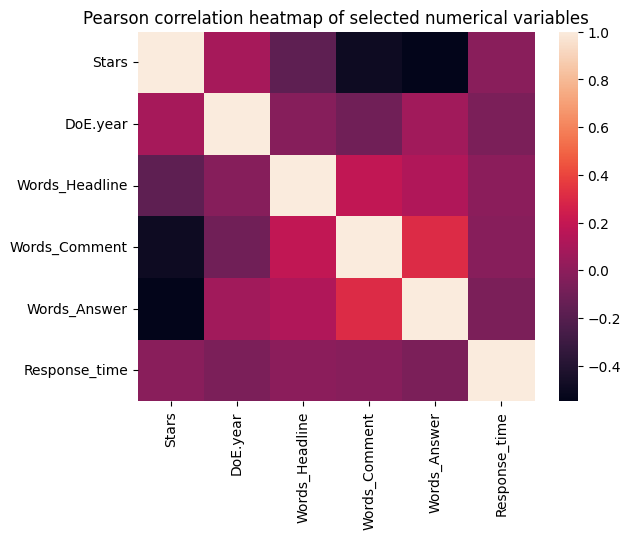

In [ ]:
sns.heatmap(corr);
plt.title('Pearson correlation heatmap of selected numerical variables')

####Distribution of Customer ratings

Text(0.5, 1.0, 'Star count')

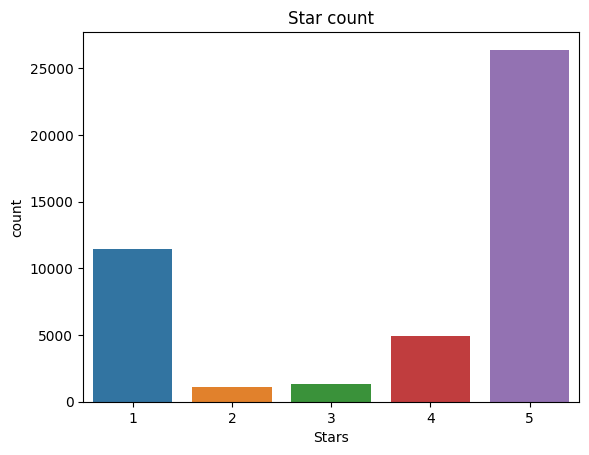

In [ ]:
sns.countplot(x=df2_proc['Stars'])
plt.title('Star count')

In [ ]:
df2_proc['Stars'].value_counts(normalize=True)

5    0.584491
1    0.253152
4    0.108475
3    0.029423
2    0.024460
Name: Stars, dtype: float64

Customers tend to write a review only if their experience is on the extremes, i.e. really bad (1) or good to very good (4 to 5).



*   69 % of reviews are either good (11%) or very good (58%)
*   25 % of reviews are really bad
*   The remaining (6%) of revies is mediocre.



#### Number of words versus stars


In [ ]:
words_vs_stars=df2_proc[['Words_Comment','Words_Answer']].groupby(df2_proc['Stars']).mean()
words_vs_stars

,Words_Comment,Words_Answer
Stars,,
1,81.306133,72.462340
2,71.537313,73.186766
3,47.063780,69.963926
4,23.123418,36.997435
5,17.484384,29.059550


Text(0.5, 1.0, 'Average word number of comments and answers')

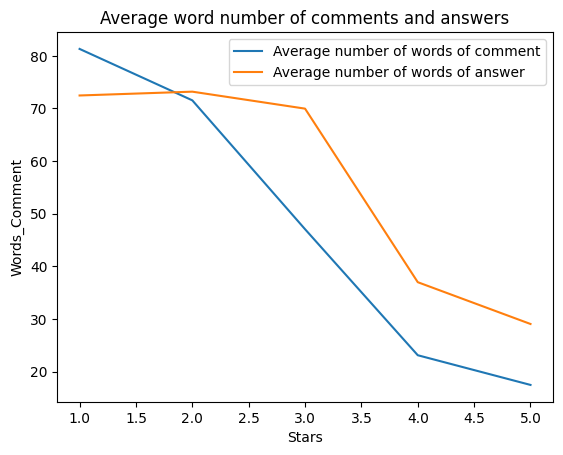

In [ ]:
plt.plot(range(1,6),words_vs_stars['Words_Comment'], label='Average number of words of comment')
plt.plot(range(1,6),words_vs_stars['Words_Answer'], label='Average number of words of answer')
plt.xlabel('Stars')
plt.ylabel('Words_Comment')
plt.legend()
plt.title('Average word number of comments and answers')

In [ ]:
from scipy.stats import pearsonr
stars=range(1,6)

print('Pearson: stars vs. avg. number of words comments:',pearsonr(stars,words_vs_stars['Words_Comment'])[0])
print('Pearson: stars vs. avg. number of words answers:',pearsonr(stars,words_vs_stars['Words_Answer'])[0])

Pearson: stars vs. avg. number of words comments: -0.9820182535884499
Pearson: stars vs. avg. number of words answers: -0.9048361948044363




*   In average, the number of **words of a comment** is a **very strong indicator** for the **number of stars** (r_cs=-0.98).   
*   In average, the number of **words of an answer** is a **strong indicator** for the **number of stars** (r_as=-0.90).

Text(0.5, 1.0, 'Number of words per comment and star rating')

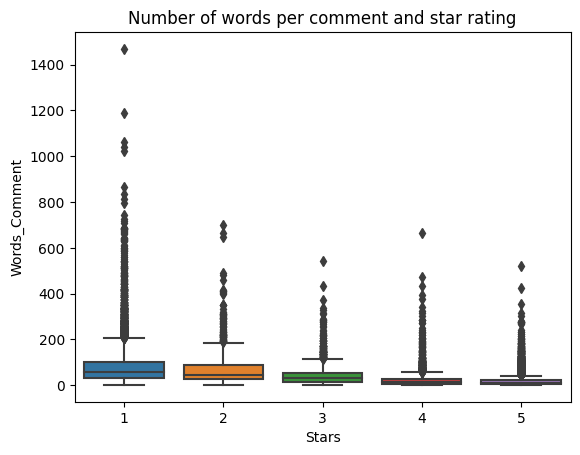

In [ ]:
sns.boxplot(x='Stars', y='Words_Comment', data=df2_proc)
plt.title('Number of words per comment and star rating')

The number of words is more volatile the lower the star rating. Especially for 1 star there are huge outliers.

Text(0.5, 1.0, "KDE's word number per comment")

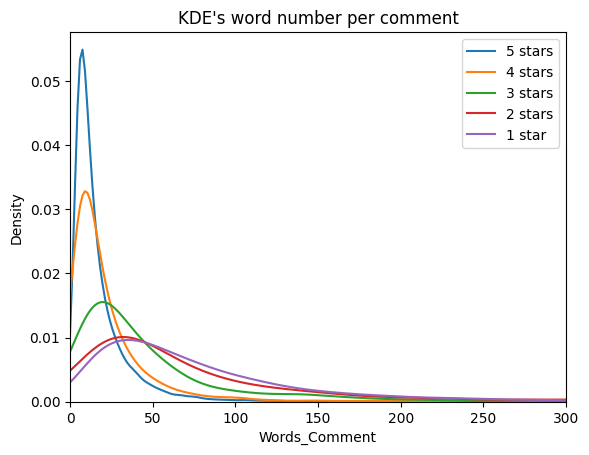

In [ ]:
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df2_proc[df2_proc['Stars']== s])['Words_Comment'], clip=(0.0, 300.0),label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per comment")

The kernel density distributions of **word number of comments** have **higher variance** and **skew to the right** for **lower star ratings**.  

<ipython-input-73-c3fa97f6fb45>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x_pdf, y_pdf, 'b', lw=2, linestyle='dashed', label='normal dist.', color='black')


Text(0.5, 1.0, 'Comparison to standard normal distribution')

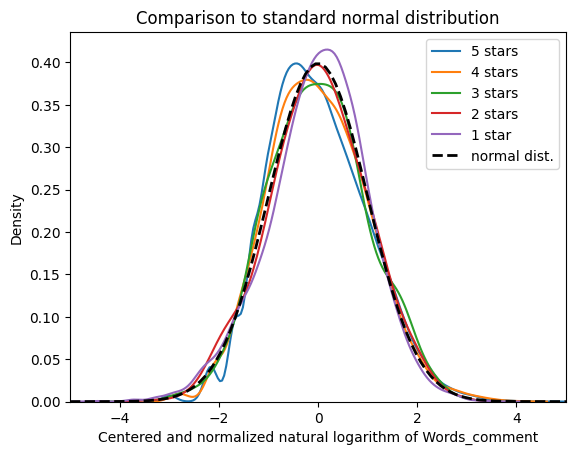

In [ ]:
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  data=np.log((df2_proc[df2_proc['Stars']== s])['Words_Comment'])
  data_standard=(data-data.mean())/np.std(data-data.mean())
  ax=sns.kdeplot(data_standard,log_scale=False, label=label)
plt.xlim(-5,5)
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = norm.pdf(x_pdf)

ax.plot(x_pdf, y_pdf, 'b', lw=2, linestyle='dashed', label='normal dist.', color='black')
plt.xlabel('Centered and normalized natural logarithm of Words_comment')
plt.legend()
plt.title("Comparison to standard normal distribution")

Text(0.5, 1.0, "KDE's word number per answer")

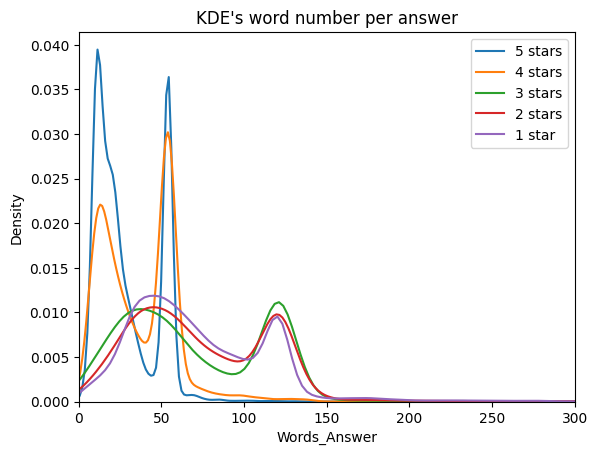

In [ ]:
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df2_proc[df2_proc['Stars']== s])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer")

Text(0.5, 1.0, "KDE's word number per answer Octopus and EoN")

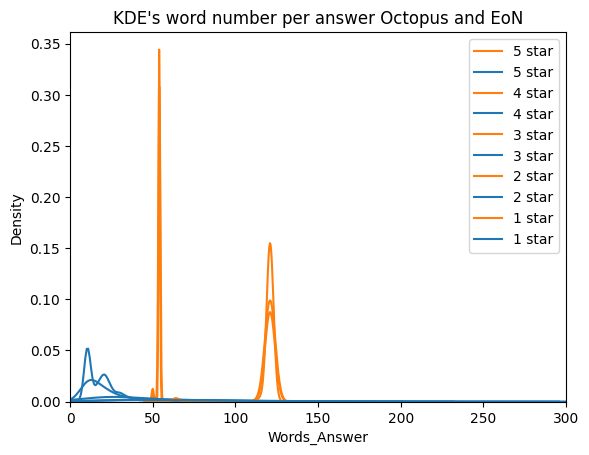

In [ ]:
#color=['purple','red','green','yellow','blue']
for s in reversed(range(1,6)):
  label=str(s)+' star'
  data=df2_proc[(df2_proc['Stars']== s)]
  data=data[(data['Company']== 'Octopus Energy Germany') | (data['Company']== 'E.ON Energie Deutschland GmbH')]
  sns.kdeplot(data, x='Words_Answer', label=label,hue='Company')
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer Octopus and EoN")

Text(0.5, 1.0, "KDE's word number per answer 'Octopus Energy Germany'")

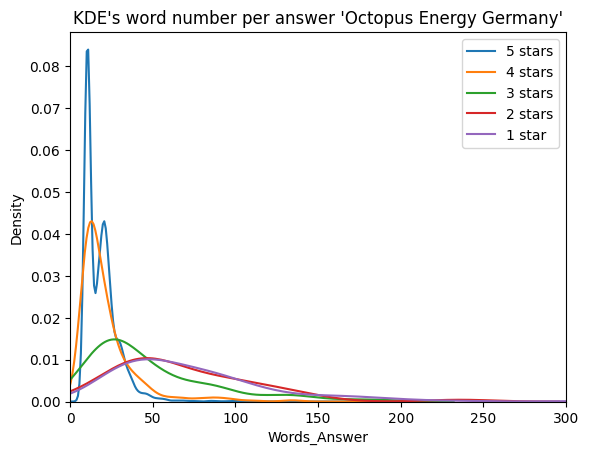

In [ ]:
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df2_proc[(df2_proc['Stars']== s)&(df2_proc['Company']== 'Octopus Energy Germany')])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer 'Octopus Energy Germany'")

Text(0.5, 1.0, "KDE's word number per answer 'E.ON Energie Deutschland GmbH'")

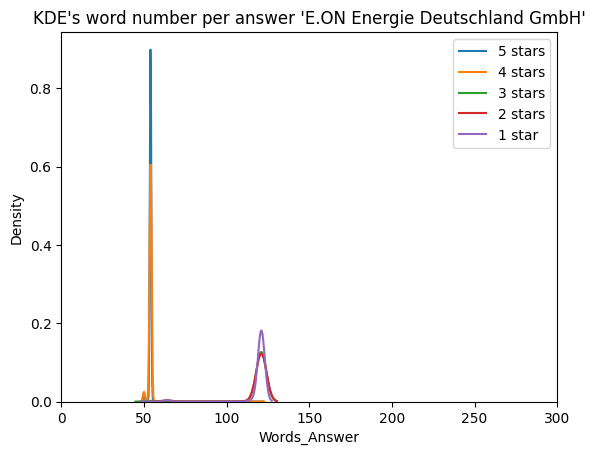

In [ ]:
for s in reversed(range(1,6)):
  if s==1: label=str(s)+' star'
  else: label=str(s)+' stars'
  sns.kdeplot((df2_proc[(df2_proc['Stars']== s)&(df2_proc['Company']== 'E.ON Energie Deutschland GmbH')])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 300)
plt.title("KDE's word number per answer 'E.ON Energie Deutschland GmbH'")

In [ ]:
df2_proc['Company'].unique()

array(['Octopus Energy Germany', 'Ostrom', 'Rabot Charge',
       'MONTANA Group', 'E.ON Energie Deutschland GmbH',
       'Grünwelt Energie', 'RheinEnergie', 'badenova', 'pricewise.de',
       'DFM-Select GmbH', 'Vattenfall Europe Sales GmbH',
       'Erdgas Südwest GmbH', 'Zenstrom', 'VeganStrom',
       'Fair Trade Power Deutschland GmbH', 'Lekker Energie GmbH',
       'Paketsparer', 'NEW Energie', 'SWK ENERGIE GmbH', 'nowenergy',
       '1KOMMA5°', 'CHONO MEDIA', 'Fresh Energy', 'Polarstern Energie',
       'Primastrom', 'eprimo GmbH', 'voxenergie', 'Lition Energie',
       'Oekostrom', 'MEP Werke', 'LichtBlick', 'RWE', 'EWE'], dtype=object)

Text(0.5, 1.0, 'Histograms: word number per answer')

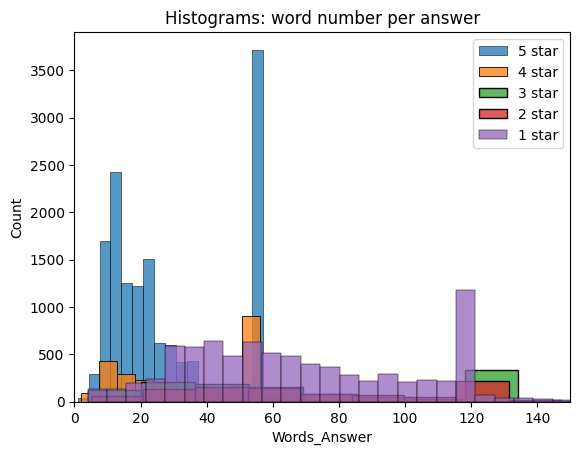

In [ ]:
for s in reversed(range(1,6)):
  label=str(s)+' star'
  sns.histplot((df2_proc[df2_proc['Stars']== s])['Words_Answer'], label=label)
plt.legend()
plt.xlim(0, 150)
plt.title("Histograms: word number per answer")

There seem to be standard answer lengths of copanies.



*   For 5 stars at 55 words
*   For 1 star at 115 words



####Number of Comments per year

Text(0.5, 1.0, 'Number of comments per year')

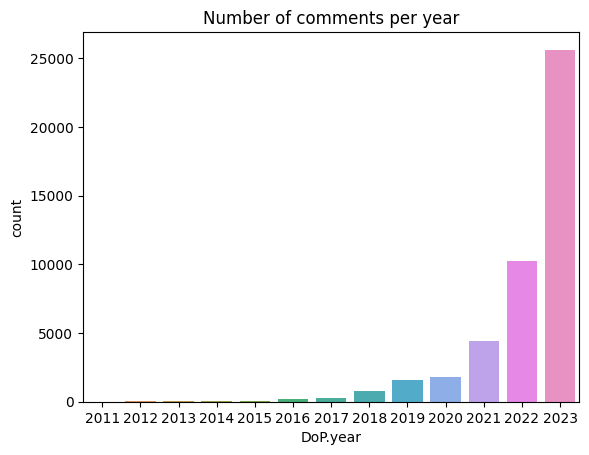

In [ ]:
sns.countplot(x=df2_proc['DoP.year'])
plt.title("Number of comments per year")

The number of comments per year seems to increase exponentially. There are very few comments from 2018 or older (< 1500). Comment numbers between 2019 and 2023 range between 1500 and 26000.

#### Average number of stars over time

Text(0, 0.5, 'Stars')

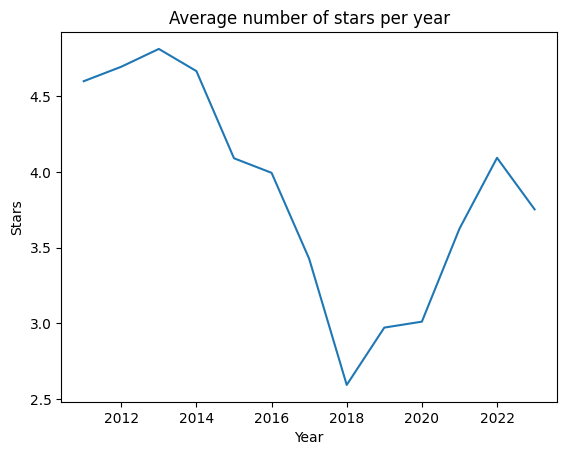

In [ ]:
stars_vs_year=df2_proc[['Stars']].groupby(df2_proc['DoE.year']).mean()

plt.plot(stars_vs_year)
plt.title("Average number of stars per year")
plt.xlabel('Year')
plt.ylabel('Stars')


*   We couldn't find an explanation for the dip at 2018. 2019 beinahe Blackout wegen liberalisierung Strommarkt. Künstliche Verknappung und spekulation hat leute unglücklich gemacht
*   The years 2018 and prior may be neglected due to very low comment numbers
*   In the years 2018 until 2022 customer satisfaction increased steadily
*   Customers seem not to be negatively bothered by the pandemic years (2020-2022)
*   There is a negative trend of customer satisfaction in line with the energy crisis induced by the war in ucraine (2022 to 2023 --> 4.2 to 3.7 stars)
*   2021 ziemlich viele Stromanbieter pleite
*   vlt auch weil plattform neu
*   anzahl anbieter ändert sich
*   vor 2020 wenig kommentare. Erst seit lockdown viele vor computer








In [ ]:
stars_vs_yearmonth=df2_proc.groupby(['DoE.year','DoE.month'])['Stars'].mean().reset_index()
stars_vs_yearmonth['date']=pd.to_datetime(stars_vs_yearmonth['DoE.year'].astype(str) + '/' + stars_vs_yearmonth['DoE.month'].astype(str) + '/01')

Text(0, 0.5, 'Stars')

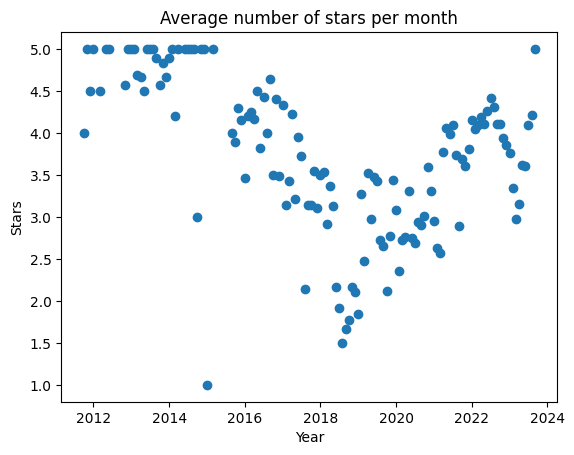

In [ ]:
plt.scatter(stars_vs_yearmonth['date'],stars_vs_yearmonth['Stars'])
plt.title("Average number of stars per month")
plt.xlabel('Year')
plt.ylabel('Stars')

####Distribution of customer locations

In [ ]:
df2_proc['Location'].unique()

array(['DE', 'GR', 'FR', 'TH', 'HR', 'IT', 'US', 'NL', 'GB', 'CH', 'FI',
       'LV', 'TR', 'JP', 'ES', 'PT', 'AT', 'BG', 'HU', 'AE', 'BE', 'JO',
       'NO', 'DK', 'GE', 'RO', 'LU', 'NZ', 'PL', 'SE', 'TN', 'RS', 'CZ',
       'MA', 'MU', 'VN', 'CN', 'ZA', 'KH', 'LA', 'ID', 'AU', 'MX', 'LT',
       'UG', 'PH', 'KR', 'CY', 'SI', 'GD', 'BA', 'IN', 'JE', 'MT', 'CA',
       'IE', 'EE', 'HK', 'GM', 'GH', 'SG', 'CM', 'BY', 'EG', 'BR', 'RU',
       'IR', 'LB', 'IS', 'BO', 'NI', 'XK', 'ML', 'AR', 'MY', 'SV', 'MV',
       'RE'], dtype=object)

In [ ]:
len(df2_proc['Location'].unique())

78

In [ ]:
df2_proc['Location'].value_counts(normalize=True)

DE    0.980899
AT    0.002855
NL    0.001881
US    0.001704
ES    0.001461
        ...   
MU    0.000022
JE    0.000022
KH    0.000022
GD    0.000022
RE    0.000022
Name: Location, Length: 78, dtype: float64

The vast majority (>98 %) of customers is from germany. However the other customers declare to come from 77 more countries. (Which partly could be trolls or accidents.)